In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
df = pd.read_csv("./time_evolution_10_levels.csv")

df.shape = (7642, 43)
df['volume_bar_label'].shape = (7642,)
df['volume_bar_label'].nunique() = 7642


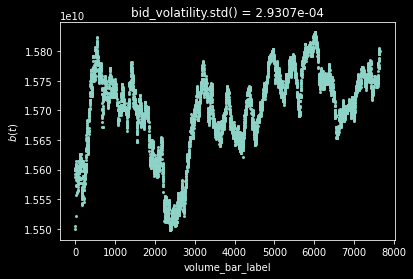

bid_volatility.std() = 2.9307e-04 (realized volatility per trade)


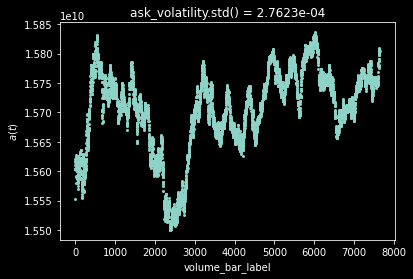

ask_volatility.std() = 2.7623e-04 (realized volatility per trade)


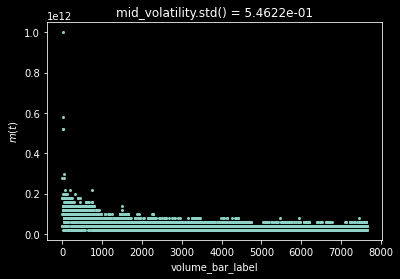

mid_volatility.std() = 5.4622e-01 (realized volatility per trade)


In [32]:
df = df.drop(df[df.bid_price_0 <= 0].index)
df = df.drop(df[df.ask_price_0 <= 0].index)
print(f"{df.shape = }")
print(f"{df['volume_bar_label'].shape = }")
print(f"{df['volume_bar_label'].nunique() = }")
bid_price_series = df.groupby("volume_bar_label")['bid_price_0'].min()
ask_price_series = df.groupby("volume_bar_label")['ask_price_0'].max()
mid_price_series = df.groupby("volume_bar_label")["mid_price"].mean()
plt.scatter([t for t in range(len(bid_price_series))], bid_price_series, marker=".", linewidth=0)
plt.xlabel("volume_bar_label")
plt.ylabel("$b(t)$")
bid_volatility = np.log(np.array(bid_price_series[1:])/np.array(bid_price_series[:-1]))
plt.title(f"{bid_volatility.std() = :.4e}")
plt.show()
print(f"{bid_volatility.std() = :.4e}", "(realized volatility per trade)")
plt.scatter([t for t in range(len(ask_price_series))], ask_price_series, marker=".", linewidth=0)
plt.xlabel("volume_bar_label")
plt.ylabel("$a(t)$")
ask_volatility = np.log(np.array(ask_price_series[1:])/np.array(ask_price_series[:-1]))
plt.title(f"{ask_volatility.std() = :.4e}")
plt.show()
print(f"{ask_volatility.std() = :.4e}", "(realized volatility per trade)")
plt.scatter([t for t in range(len(mid_price_series))], mid_price_series, marker=".", linewidth=0)
plt.xlabel("volume_bar_label")
plt.ylabel("$m(t)$")
mid_volatility = np.log(np.array(mid_price_series[1:])/np.array(mid_price_series[:-1]))
plt.title(f"{mid_volatility.std() = :.4e}")
plt.show()
print(f"{mid_volatility.std() = :.4e}", "(realized volatility per trade)")

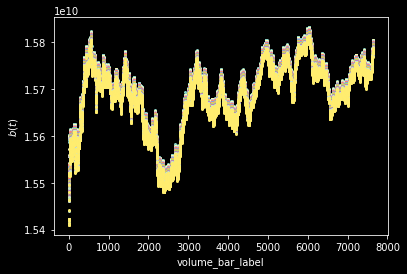

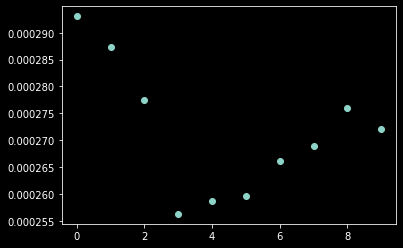

In [42]:
bid_volatility = []
for level in range(10):
    bid_price_series = df.groupby("volume_bar_label")['bid_price_{}'.format(level)].min()
    plt.scatter([t for t in range(len(bid_price_series))], bid_price_series, marker=".", linewidth=0)
    plt.xlabel("volume_bar_label")
    plt.ylabel("$b(t)$")
    bid_volatility.append(np.log(np.array(bid_price_series[1:])/np.array(bid_price_series[:-1])).std())
plt.show()
plt.scatter(range(10), bid_volatility)